# A dataset about cans of beer.

Data from http://craftcans.com/

## Do your importing and your setup

In [1]:
import pandas as pd
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv")
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out breweries

Where does beer come from????

## What are the top 10 producers of cans of beer?

In [5]:
df.sort_values(by=['Brewery'], ascending=False).head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1600,Wynkoop Pumpkin Ale,Wynkoop Brewing Company,"Denver, CO",Pumpkin Ale,12 oz.,5.50%,NaN
1978,B3K Black Lager,Wynkoop Brewing Company,"Denver, CO",Schwarzbier,12 oz.,5.50%,NaN
1308,Patty's Chile Beer,Wynkoop Brewing Company,"Denver, CO",Chile Beer,12 oz.,4.20%,NaN
1336,Colorojo Imperial Red Ale,Wynkoop Brewing Company,"Denver, CO",American Strong Ale,12 oz.,8.20%,NaN
2332,Rail Yard Ale (2009),Wynkoop Brewing Company,"Denver, CO",American Amber / Red Ale,12 oz.,5.20%,NaN
1610,Rocky Mountain Oyster Stout,Wynkoop Brewing Company,"Denver, CO",American Stout,12 oz.,7.50%,NaN
2286,Silverback Pale Ale,Wynkoop Brewing Company,"Denver, CO",American Pale Ale (APA),12 oz.,5.50%,40.0
1808,Rail Yard Ale,Wynkoop Brewing Company,"Denver, CO",American Amber / Red Ale,12 oz.,5.20%,NaN
1714,Belgorado,Wynkoop Brewing Company,"Denver, CO",Belgian IPA,12 oz.,6.70%,45.0
1149,Worthy IPA (2013),Worthy Brewing Company,"Bend, OR",American IPA,12 oz.,6.90%,69.0


In [6]:
df['Brewery'].value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common size of beer?

The answer won't be pretty - we'll learn to clean it up in a week or two.

In [7]:
df['Size'].describe()

count       2410
unique        16
top       12 oz.
freq        1507
Name: Size, dtype: object

## What is the most common ABV? (alcohol by volume)

In [8]:
df['ABV'].describe()

count      2410
unique       75
top       5.00%
freq        215
Name: ABV, dtype: object

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take three steps:

1. List just the ABV of every row
2. Remove the % symbol
3. Convert it to a `float`
4. Save it into a new column. Or the same column, if you're feeling wild.

Although it *also* turns out that there's some bad data in there. We'll need to clean that up, too.

In [9]:
df.ABV.str.replace("%", "")

0        4.50
1        4.90
2        4.80
3        6.00
4        6.00
5        5.60
6        8.00
7       12.50
8        7.70
9        4.20
10       5.00
11       6.60
12       4.00
13       5.50
14       7.60
15       5.10
16       6.50
17       6.00
18       5.00
19       5.20
20       4.80
21       7.20
22       6.70
23       4.90
24       8.00
25       7.50
26       6.00
27       8.00
28       6.30
29       5.80
        ...  
2386     5.70
2387     6.20
2388     4.90
2389     9.90
2390     6.20
2391     5.80
2392     5.20
2393     8.50
2394     7.00
2395     5.30
2396     5.60
2397     4.90
2398     5.10
2399     4.00
2400     5.50
2401     5.10
2402     5.10
2403     9.70
2404     5.10
2405     6.70
2406     6.20
2407     8.30
2408     7.00
2409     4.90
2410     9.90
2411     5.30
2412     9.90
2413     8.00
2414     8.70
2415     6.50
Name: ABV, Length: 2416, dtype: object

In [10]:
df['ABV'] = df.ABV.str.replace("%", "")

In [11]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00,25.0


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [12]:
df['Location'].value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [13]:
df[df['Location'] == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.00,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.20,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.00,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.00,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.20,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.50,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.50,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.70,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.90,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.70,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [14]:
Brooklyn = df[df['Location'] == 'Brooklyn, NY']
Brooklyn['Brewery'].value_counts()        

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [15]:
Sixpoint = df[df['Brewery'] == 'Sixpoint Craft Ales']
Sixpoint['Style'].value_counts().head(5)

American IPA                      4
Cream Ale                         2
German Pilsener                   2
American Double / Imperial IPA    2
Rye Beer                          2
Name: Style, dtype: int64

## List all of the breweries in New York state. Then count them.

In [16]:
df['Location'].str.contains("NY").value_counts()

False    2336
True       74
Name: Location, dtype: int64

In [17]:
df[df['Location'].str.contains("NY", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.00,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.20,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.00,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.00,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.20,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.50,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.50,62.0
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.00,69.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.50,40.0
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.20,35.0


# Measuring International Bitterness Units

IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## What is the average IBU measurement across all beers?

In [20]:
df['IBUs'].mean()

42.713167259786474

## Draw the distribution of IBU measurements, but with *thirty* bins instead of the default of 10

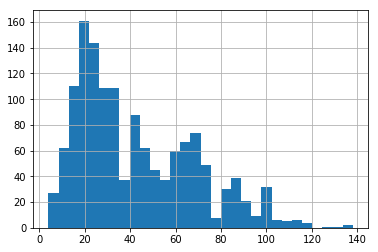

In [22]:
df['IBUs'].hist(bins=30)

## List all of the beers with IBUs above the 75th percentile

In [87]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [88]:
df[df['IBUs'] > 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.20,80.0
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.70,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.50,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00,100.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.50,75.0


## List all of the beers with IBUs below the 25th percentile

In [93]:
df[df['IBUs'] < 21]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.00,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.50,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.00,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.20,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.80,15.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.70,19.0
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.60,16.0
32,KSA,Fort Point Beer Company,"San Francisco, CA",Kölsch,12 oz.,4.60,17.0
54,Sparkle,Petoskey Brewing,"Petoskey, MI",American Pale Lager,16 oz.,4.10,12.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the nan ones at the bottom. I want a nice graph, too - don't let them all be squished together, either!

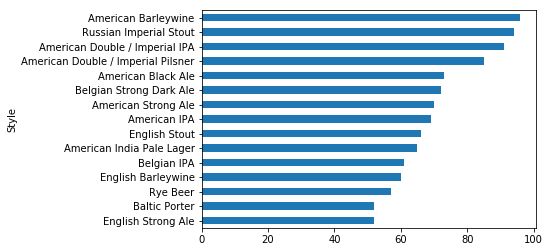

In [38]:
median_ibus = df.groupby("Style")['IBUs'].median()
median_ibus.dropna().sort_values(ascending=True).tail(15).plot(kind='barh')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

You'll want to think about it in three pieces - finding the high IBU beers, then finding out what the most common styles are, then getting the top 5.

In [122]:
high_ibu = df[df['IBUs'] > 64]

high_ibu['Style'].value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [121]:
low_ibu = df[df['IBUs'] < 21]

low_ibu['Style'].value_counts().head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles (also draw a histogram)

I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

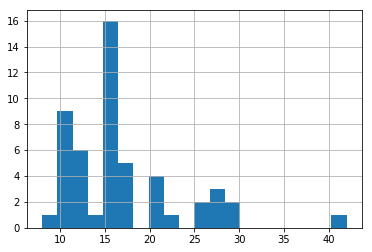

In [78]:
styles_three = df[df["Style"].isin(["Witbier", "Hefeweizen", "Ale"])]
styles_three['IBUs'].mean()
styles_three['IBUs'].hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [52]:
style_ipa = df[df["Style"].str.contains("IPA", na=False)]
style_ipa['IBUs'].mean()

71.948979591836732

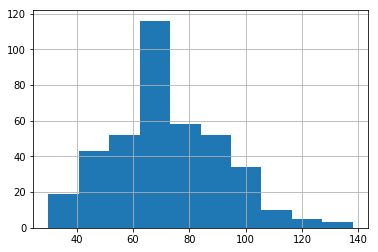

In [54]:
style_ipa['IBUs'].hist()

## Plot those two histograms on top of one another

## Compare the ABV of wheat beers vs. IPAs 